In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data_path = "/content/drive/MyDrive/Covid 19 India/final with target.csv"
data = pd.read_csv(data_path)

data = data.drop([33483, 62824])
data = data.reset_index().drop(['index'], axis = 1)
data

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,meditation and mindfulness tips for coping wit...,0.125000,"pune, india",mar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,contribute to india fights corona gandhinagar...,0.000000,"gandhinagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"sir, please send a team immediately to sa...",0.000000,"bidhan nagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.033333,"maharashtra, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,mata di doston ise #corona ke tarah faila do ...,0.600000,"bokaro steel city, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145548,wow good to see these kids interest in onli...,0.350000,lb nagar,sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145549,"83,812 new cases and 1054 deaths in last 24 ...",0.068182,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145550,unlocking the #lockdown - women’s rights &amp;...,-0.175000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145551,astrazeneca covid-19 vaccine trial in us on ho...,0.000000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [7]:
print(data.iloc[145551])
print(data['tweet'].iloc[145551])

tweet              astrazeneca covid-19 vaccine trial in us on ho...
sentiment_score                                                    0
place                                               new delhi, india
month                                                            sep
Optimistic                                                         0
Thankful                                                           0
Empathetic                                                         0
Pessimistic                                                        0
Anxious                                                            0
Sad                                                                0
Annoyed                                                            0
Denial                                                             0
Official report                                                    1
Surprise                                                           1
Joking                            

In [16]:
data.iloc[:, 4:] = data.iloc[:, 4:].astype(int)

**Calculating number of tweets having each emotion**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


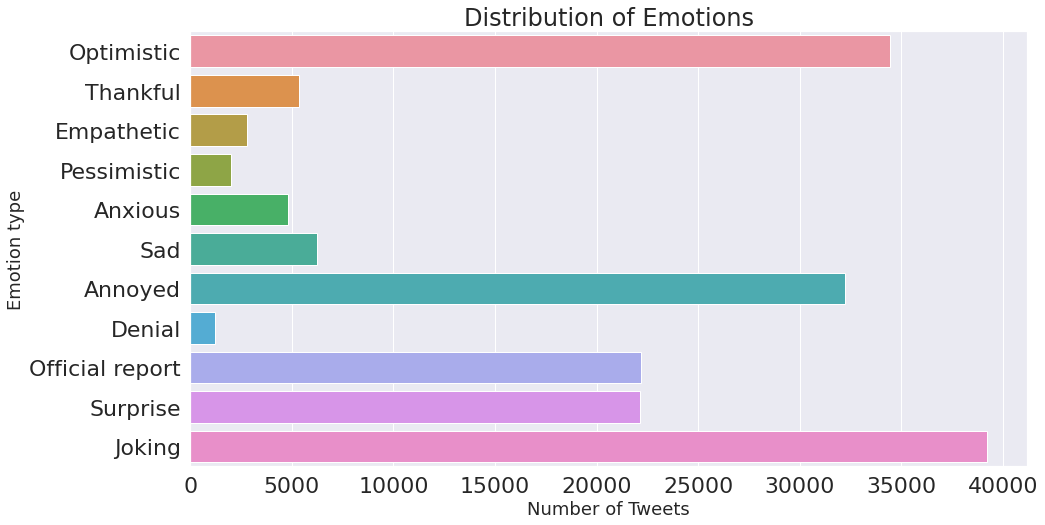

In [24]:
categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 18)
plt.ylabel('Emotion type', fontsize = 18)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

Question? To keep denial or not?
Decided not to keep

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


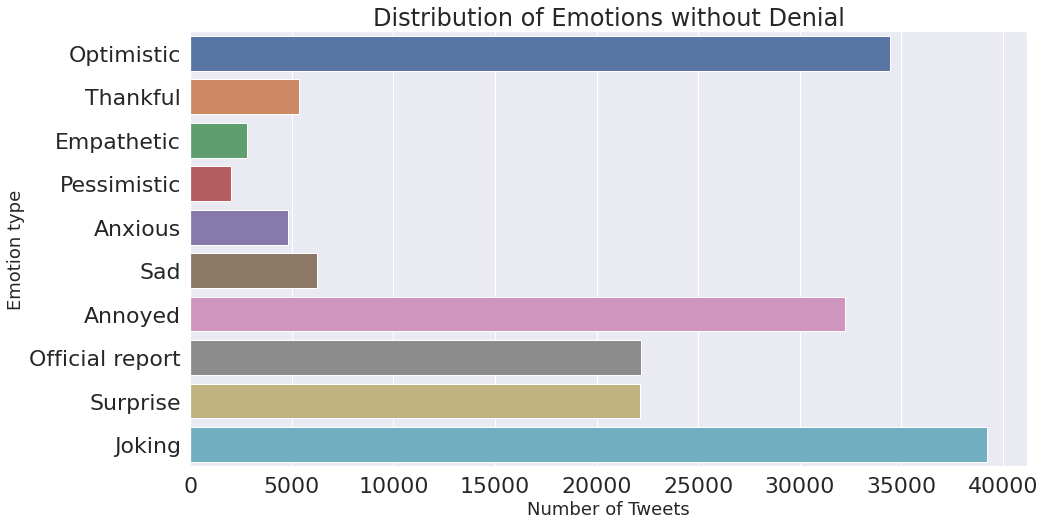

In [55]:
data = data.drop(['Denial'], axis = 1)

categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
plt.title("Distribution of Emotions without Denial", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 18)
plt.ylabel('Emotion type', fontsize = 18)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

**Calculating number of tweets having multiple labels**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


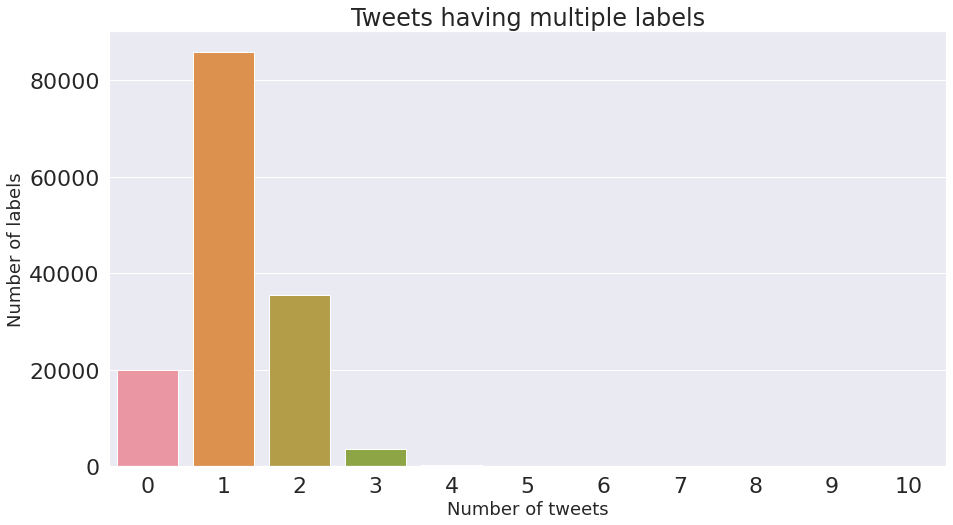

In [56]:
rowSums = data.iloc[:, 4:].sum(axis = 1)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

plt.title("Tweets having multiple labels")
plt.xlabel('Number of tweets', fontsize = 18)
plt.ylabel('Number of labels', fontsize = 18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Monthwise visualisation of emotions**

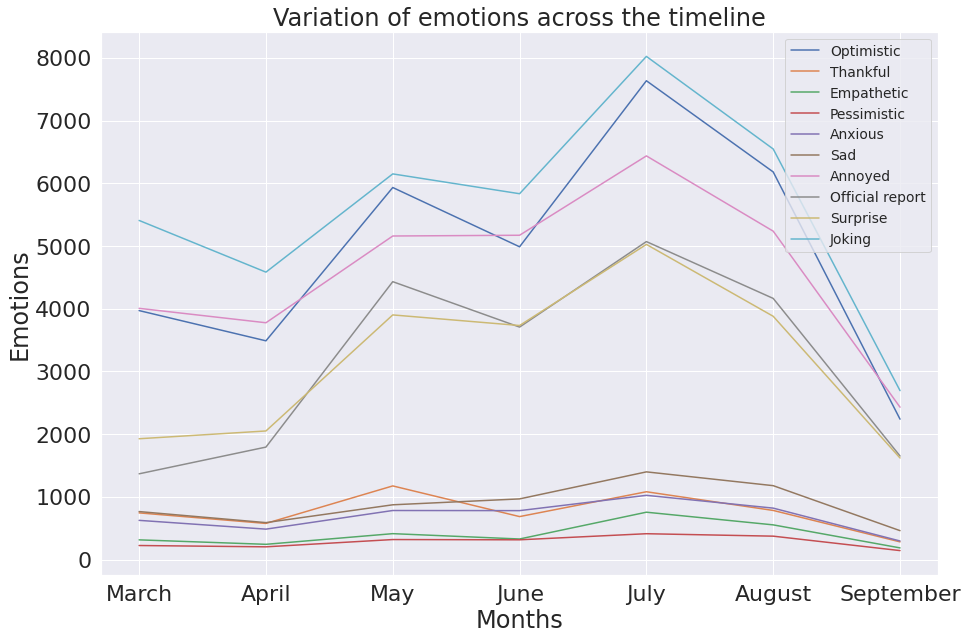

In [58]:
#x axis -> months
#y axis -> emotions
emotions = data.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [data[data['month'] == 'mar'][x].sum() for x in emotions]
april = [data[data['month'] == 'apr'][x].sum() for x in emotions]
may = [data[data['month'] == 'may'][x].sum() for x in emotions]
june = [data[data['month'] == 'jun'][x].sum() for x in emotions]
july = [data[data['month'] == 'jul'][x].sum() for x in emotions]
august = [data[data['month'] == 'aug'][x].sum() for x in emotions]
september = [data[data['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Emotions")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
plt.title("Variation of emotions across the timeline")
plt.show()

In [52]:
data['month'].value_counts()

jul    31745
aug    25784
may    24701
jun    22931
mar    15392
apr    14489
sep    10511
Name: month, dtype: int64